In [1]:
import numpy as np
import matplotlib.pyplot as plt
%run ../prop/propagators_1d.py
import sys
sys.path.append("/home/sajid/packages/xray-wave-propagators/prop/cython/binaries")
import prop1d_cython

In [2]:
energy = 1000
wavel = (1240/energy)*10**(-9)
pi = np.pi
L_in  = 5e-6

In [3]:
def plot_3_distance(prop):
    f, ax = plt.subplots(3,3)
    i = 0
    for z in [1e-6,200e-6,250e-3]:

        N1 = 2500 #N for spectral method
        sampling = L_in/N1
        critical = (wavel*z/L_in)
        if sampling>critical:
            print('Use TF')
        else :
            print('Use IR/1FT')
        print('Fresnel Number :', (L_in**2)/(wavel*z))

        in_wave = np.zeros(N1)
        in_wave[int(N1/2)-int(N1/8):int(N1/2)+int(N1/8)] = 1
        out_wave_exact = np.zeros((N1),dtype='complex128')

        out_,L_ = prop(in_wave,L_in/N1,L_in,wavel,z)
        out_domain_ = np.linspace(-L_/2,L_/2,N1)


        N = 25000
        in_wave = np.zeros(N,dtype='complex128')
        in_wave[int(N/2)-int(N/8):int(N/2)+int(N/8)] = 1
        out_wave_exact = np.zeros((N),dtype='complex128')
        in_domain_exact  = np.linspace(-L_in/2,L_in/2,N)
        out_domain_exact = np.linspace(-L_/2,L_/2,N)
        prop1d_cython.exact_prop_cython(in_wave,out_wave_exact,L_in,L_,wavel,z)


        ax[i,0].plot(in_domain_exact*1e6,np.abs(in_wave))
        ax[i,0].set_xlabel('co-ordinates in um',fontsize = 15)
        ax[i,0].set_title('Input', fontsize = 15)

        ax[i,1].plot(out_domain_*1e6, np.abs(out_),'g')
        ax[i,1].set_xlabel('co-ordinates in um',fontsize = 15)
        ax[i,1].set_title('Output', fontsize = 15)

        ax[i,2].plot(out_domain_exact*1e6, np.abs(out_wave_exact),'b')
        ax[i,2].set_xlabel('co-ordinates in um',fontsize = 15)
        ax[i,2].set_title('Output exact', fontsize = 15)
        i = i+1
        #f.suptitle('Fresnel Number : '+str((L_in**2)/(wavel*z)),fontsize = 25)
    f.set_size_inches(30, 30, forward=True)
    plt.show()

Use TF
Fresnel Number : 20161.290322580648
Use IR/1FT
Fresnel Number : 100.80645161290325
Use IR/1FT
Fresnel Number : 0.08064516129032259


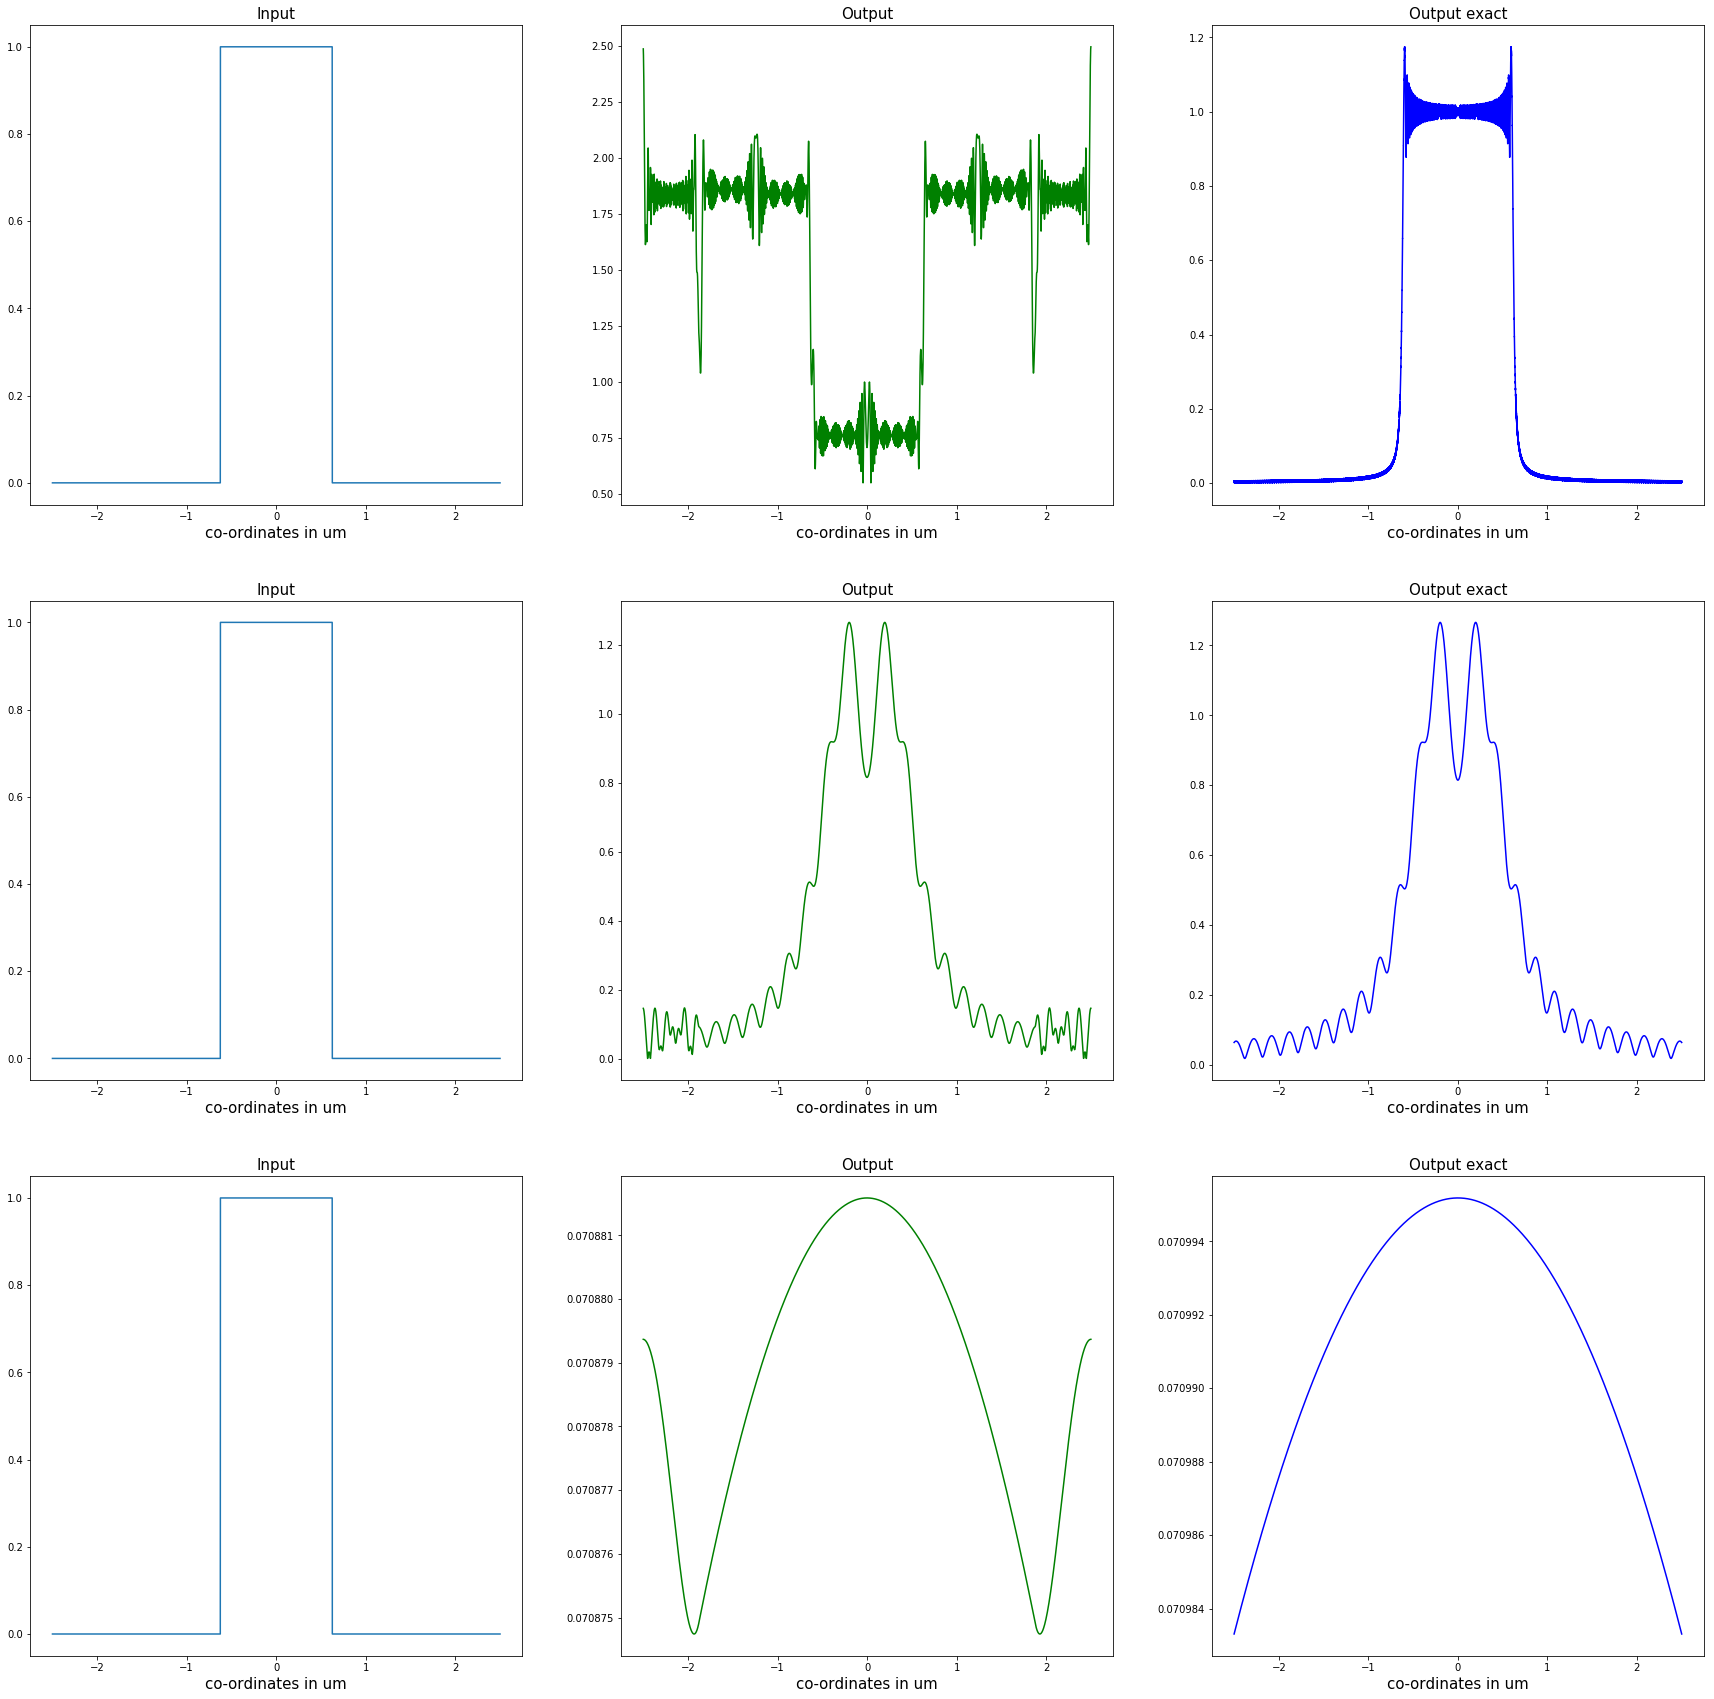

In [4]:
plot_3_distance(propIR)